# Simulations Results

This notebook presents the results for basic analysis of the simulations of spread of lockdown adherence opinions.

* Last update: 2020-04-29
* Coder: Eric Araujo


In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

import seaborn as sns; sns.set(color_codes=True)

import get_df as gdf

#from scipy.stats import pearsonr
f_results = './results/20200428/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Results DF

In [2]:
results_df = gdf.get_results_df()

results_df.head()

,run,beta,sigma,population,nw_topology,step,num_lockdown,num_not_lockdown,opinion_avg
0,8,0.1,1,100,erdos-renyi,886,3,97,0.034692
1,4,0.1,1,100,erdos-renyi,869,2,98,0.053764
2,5,0.1,1,100,erdos-renyi,901,6,94,0.044671
3,2,0.1,1,100,erdos-renyi,887,5,95,0.044678
4,7,0.1,1,100,erdos-renyi,895,7,93,0.044260


In [3]:
set(results_df.nw_topology)

{'barabasi-albert', 'erdos-renyi', 'small-world', 'uniform'}

In [4]:
set(results_df.beta)

{0.1, 0.3, 0.5, 0.7, 0.9}

In [5]:
set(results_df.sigma)

{1, 5, 10}

In [6]:
erdos_df = results_df[results_df.nw_topology == 'erdos-renyi']
barabasi_df = results_df[results_df.nw_topology == 'barabasi-albert']
small_w_df = results_df[results_df.nw_topology == 'small-world']
uniform_df = results_df[results_df.nw_topology == 'uniform']

In [7]:
len(erdos_df)

1500

## How long the simulation lasted on average?

In [8]:
# LATER: make a graphic with all the strategies and their average duration and std
print("Statistics:\n-----------------------------------------------------------------------------")
print("Topology\t\tMin\t Max\t Diff\t Mean\t\t Std\n-----------------------------------------------------------------------------")
print("Erdos-Renyi\t\t", erdos_df.step.min(), "\t", erdos_df.step.max(), "\t", 
      (erdos_df.step.max() - erdos_df.step.min()), "\t", erdos_df.step.mean(), 
      "\t", round(erdos_df.step.std(),2))
print("Barabasi-Albert\t\t", barabasi_df.step.min(), "\t", barabasi_df.step.max(), "\t", 
      (barabasi_df.step.max() - barabasi_df.step.min()), "\t", round(barabasi_df.step.mean(),2), "\t", 
      round(barabasi_df.step.std(),2))
print("Small-world\t\t", small_w_df.step.min(), "\t", small_w_df.step.max(), "\t", 
      (small_w_df.step.max() - small_w_df.step.min()), "\t", round(small_w_df.step.mean(),2), "\t", 
      round(small_w_df.step.std(),2))
print("Uniform\t\t\t", uniform_df.step.min(), "\t", uniform_df.step.max(), "\t", 
      (uniform_df.step.max() - uniform_df.step.min()), "\t", round(uniform_df.step.mean(),2), "\t", 
      round(uniform_df.step.std(),2))
print("-----------------------------------------------------------------------------")

Statistics:
-----------------------------------------------------------------------------
Topology		Min	 Max	 Diff	 Mean		 Std
-----------------------------------------------------------------------------
Erdos-Renyi		 164 	 9798 	 9634 	 1226.54 	 722.46
Barabasi-Albert		 181 	 3063 	 2882 	 1092.57 	 336.21
Small-world		 151 	 13064 	 12913 	 1181.47 	 617.59
Uniform			 161 	 3983 	 3822 	 1126.38 	 408.9
-----------------------------------------------------------------------------


In [9]:
erdos_steps_df = gdf.get_scenarios_step(erdos_df)
barabasi_steps_df = gdf.get_scenarios_step(barabasi_df)
small_world_steps_df = gdf.get_scenarios_step(small_w_df)
uniform_steps_df = gdf.get_scenarios_step(uniform_df)

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

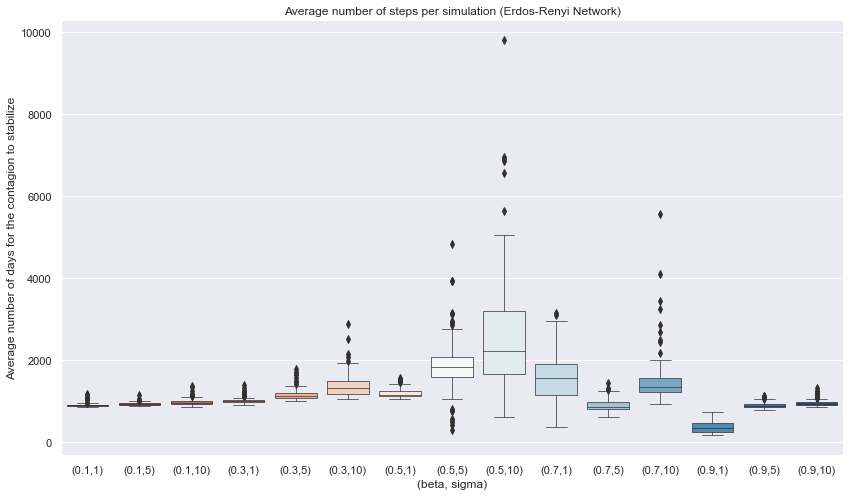

In [12]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=erdos_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(erdos_steps_df.columns)
g.set_title('Average number of steps per simulation (Erdos-Renyi Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

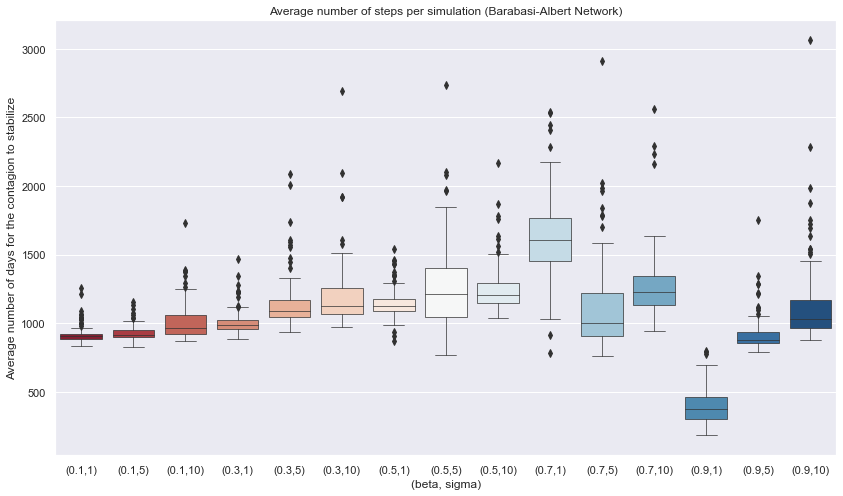

In [13]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=barabasi_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(barabasi_steps_df.columns)
g.set_title('Average number of steps per simulation (Barabasi-Albert Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

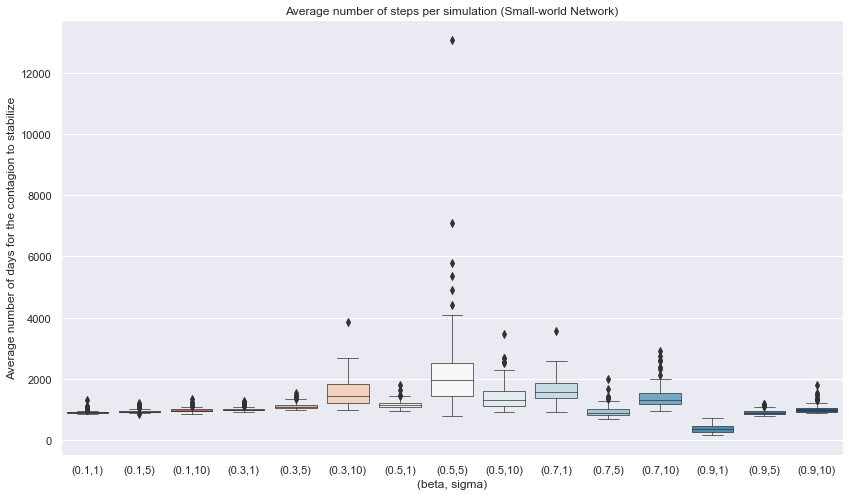

In [14]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=small_world_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(small_world_steps_df.columns)
g.set_title('Average number of steps per simulation (Small-world Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

Text(0, 0.5, 'Average number of days for the contagion to stabilize')

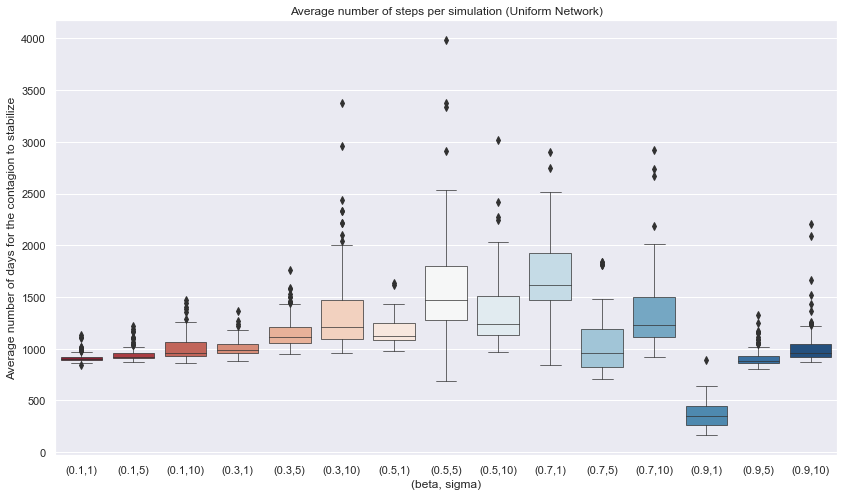

In [15]:
plt.figure(figsize=((14,8)))
g = sns.boxplot(data=uniform_steps_df, palette=sns.color_palette("RdBu", n_colors=15), 
                linewidth=0.7)
g.set_xticklabels(uniform_steps_df.columns)
g.set_title('Average number of steps per simulation (Uniform Network)')
g.set_xlabel("(beta, sigma)")
g.set_ylabel("Average number of days for the contagion to stabilize")

# Opinions

In [17]:
erdos_opinion_df = gdf.get_opinions(erdos_df)
barabasi_opinion_df = gdf.get_opinions(barabasi_df)
small_world_opinion_df = gdf.get_opinions(small_w_df)
uniform_opinion_df = gdf.get_opinions(uniform_df)

In [18]:
erdos_opinion_df.columns

Index(['(0.1,1)', '(0.1,5)', '(0.1,10)', '(0.3,1)', '(0.3,5)', '(0.3,10)',
       '(0.5,1)', '(0.5,5)', '(0.5,10)', '(0.7,1)', '(0.7,5)', '(0.7,10)',
       '(0.9,1)', '(0.9,5)', '(0.9,10)'],
      dtype='object')

In [19]:
df_list = []
for col in erdos_opinion_df.columns:
    df_list.append(pd.DataFrame([erdos_opinion_df[col], 
                                 barabasi_opinion_df[col], 
                                 small_world_opinion_df[col], 
                                 uniform_opinion_df[col],
                                ], index=['Erdos-Renyi {}'.format(col), 'Barabasi-Albert {}'.format(col), 
                                          'Small-world {}'.format(col), 'Lattice-2D {}'.format(col)]).T)

In [20]:
range(len(df_list))

range(0, 15)

In [21]:
df_list[1]

,"Erdos-Renyi (0.1,5)","Barabasi-Albert (0.1,5)","Small-world (0.1,5)","Lattice-2D (0.1,5)"
0,0.035258,0.035103,0.044842,0.034938
1,0.045058,0.073227,0.044253,0.035249
2,0.045109,0.034775,0.056676,0.055405
3,0.045000,0.044268,0.044330,0.034882
4,0.045174,0.080213,0.035010,0.055077
...,...,...,...,...
95,0.054405,0.054682,0.055254,0.034578
96,0.045001,0.055499,0.045782,0.034565
97,0.054878,0.034731,0.054165,0.034884
98,0.045272,0.080777,0.045332,0.034851


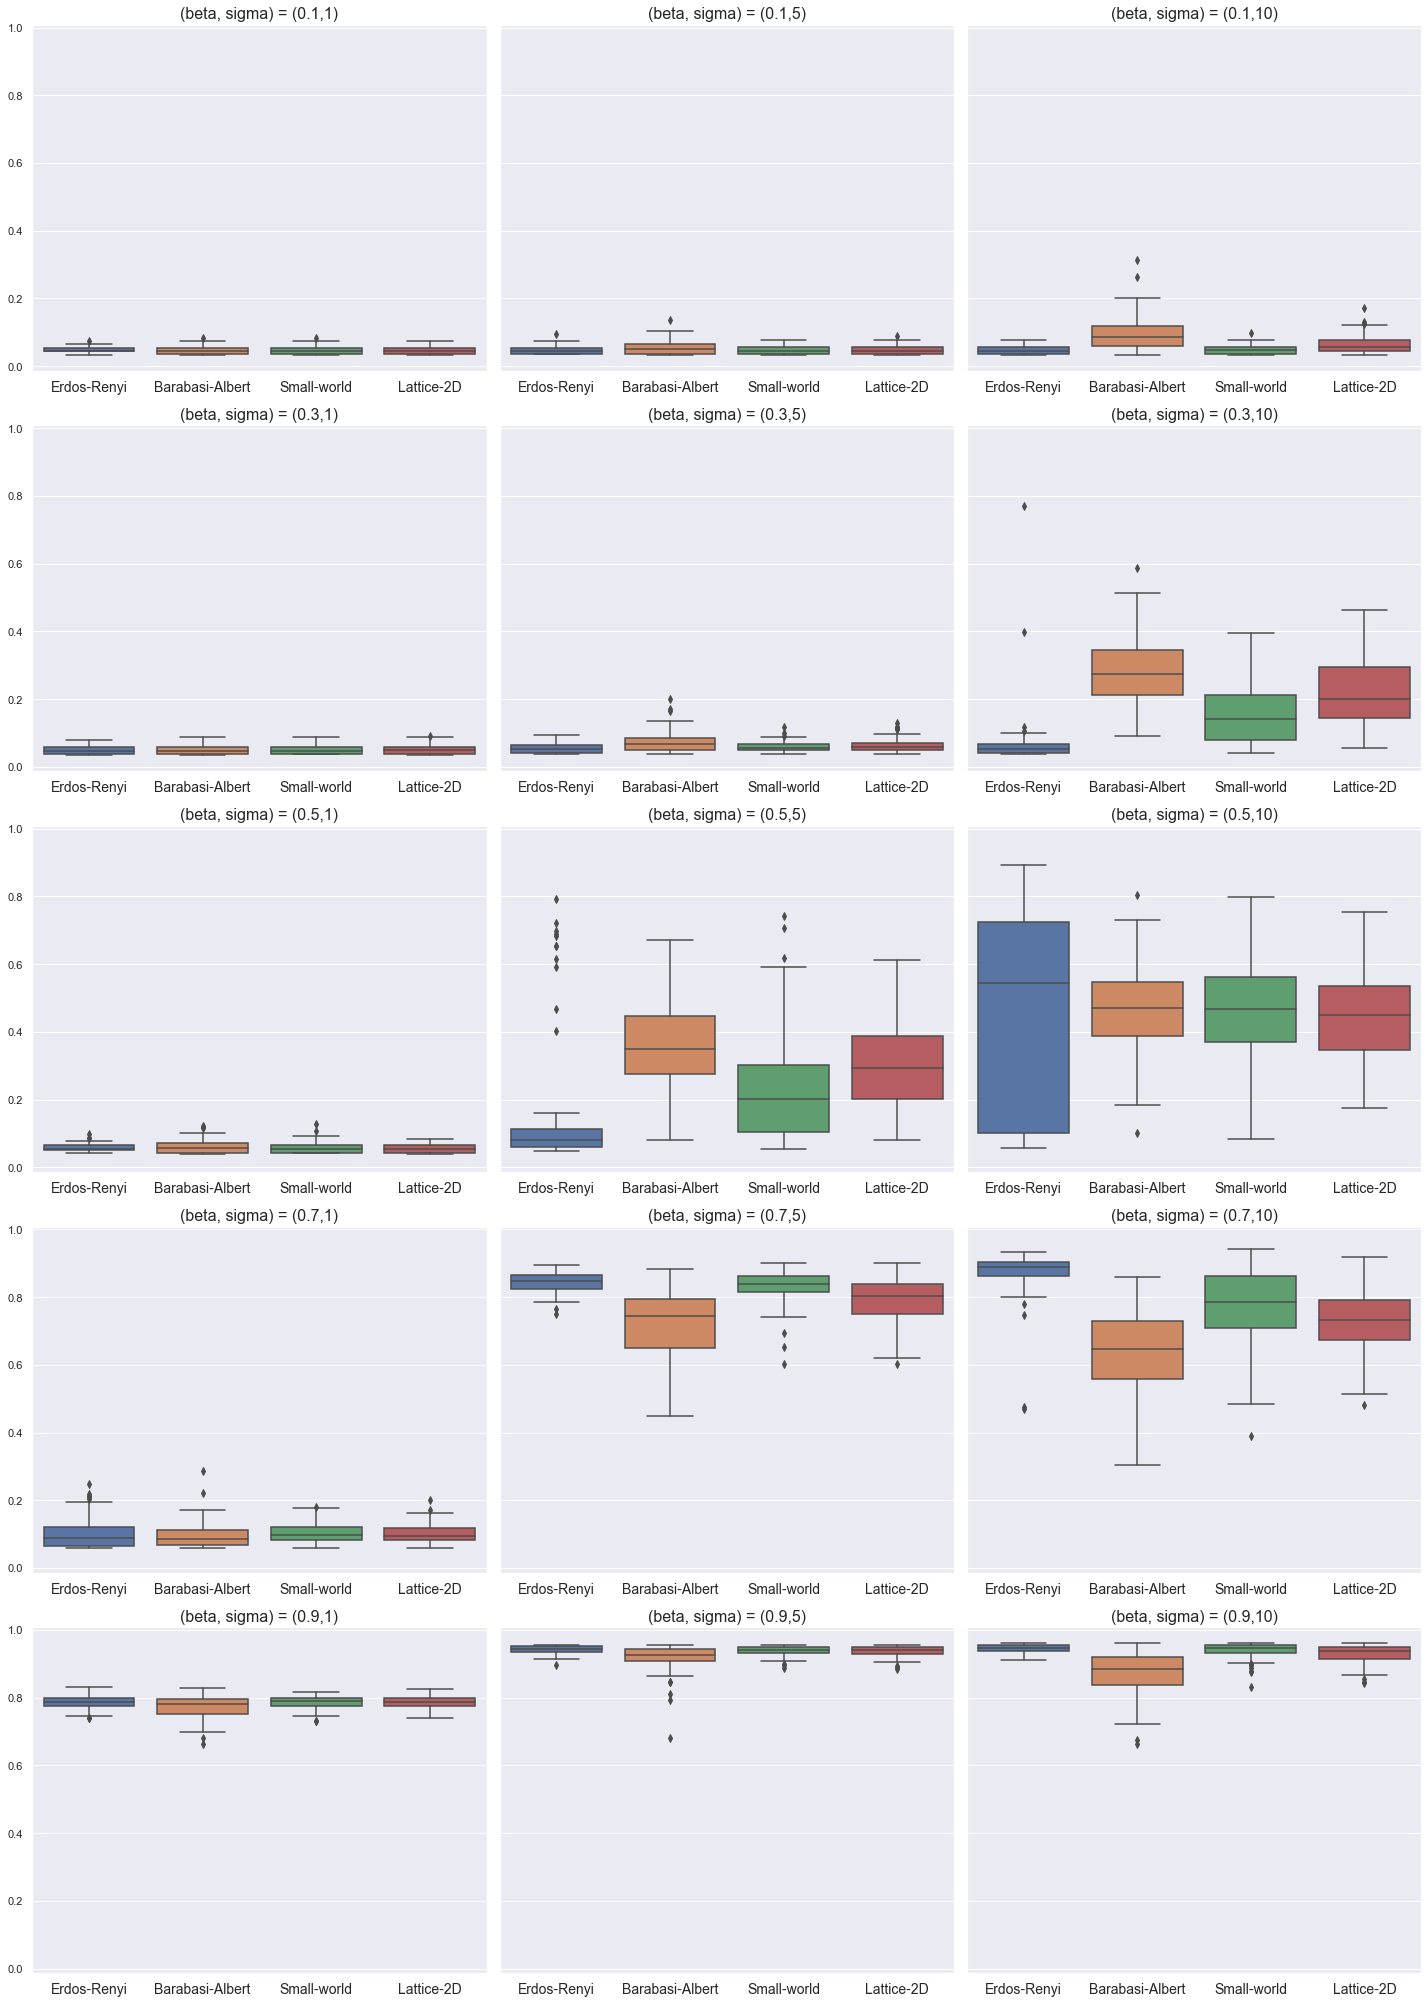

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=((20,28)), sharey=True)

for i in range(5):
    for j in range(3):
        sns.boxplot(data=df_list[i*3+j], ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in df_list[i*3+j].columns], size=14)
        axes[i,j].set_title("(beta, sigma) = " + df_list[i*3+j].columns[0].split(sep=" ")[1], size=16)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


# Lockdown

In [30]:
erdos_lock_df = gdf.get_perc_lockdown(erdos_df)
barabasi_lock_df = gdf.get_perc_lockdown(barabasi_df)
small_world_lock_df = gdf.get_perc_lockdown(small_w_df)
uniform_lock_df = gdf.get_perc_lockdown(uniform_df)

In [31]:
lock_list = []
for col in erdos_lock_df.columns:
    lock_list.append(pd.DataFrame([erdos_lock_df[col], 
                                 barabasi_lock_df[col], 
                                 small_world_lock_df[col], 
                                 uniform_lock_df[col],
                                ], index=['Erdos-Renyi {}'.format(col), 'Barabasi-Albert {}'.format(col), 
                                          'Small-world {}'.format(col), 'Lattice-2D {}'.format(col)]).T)

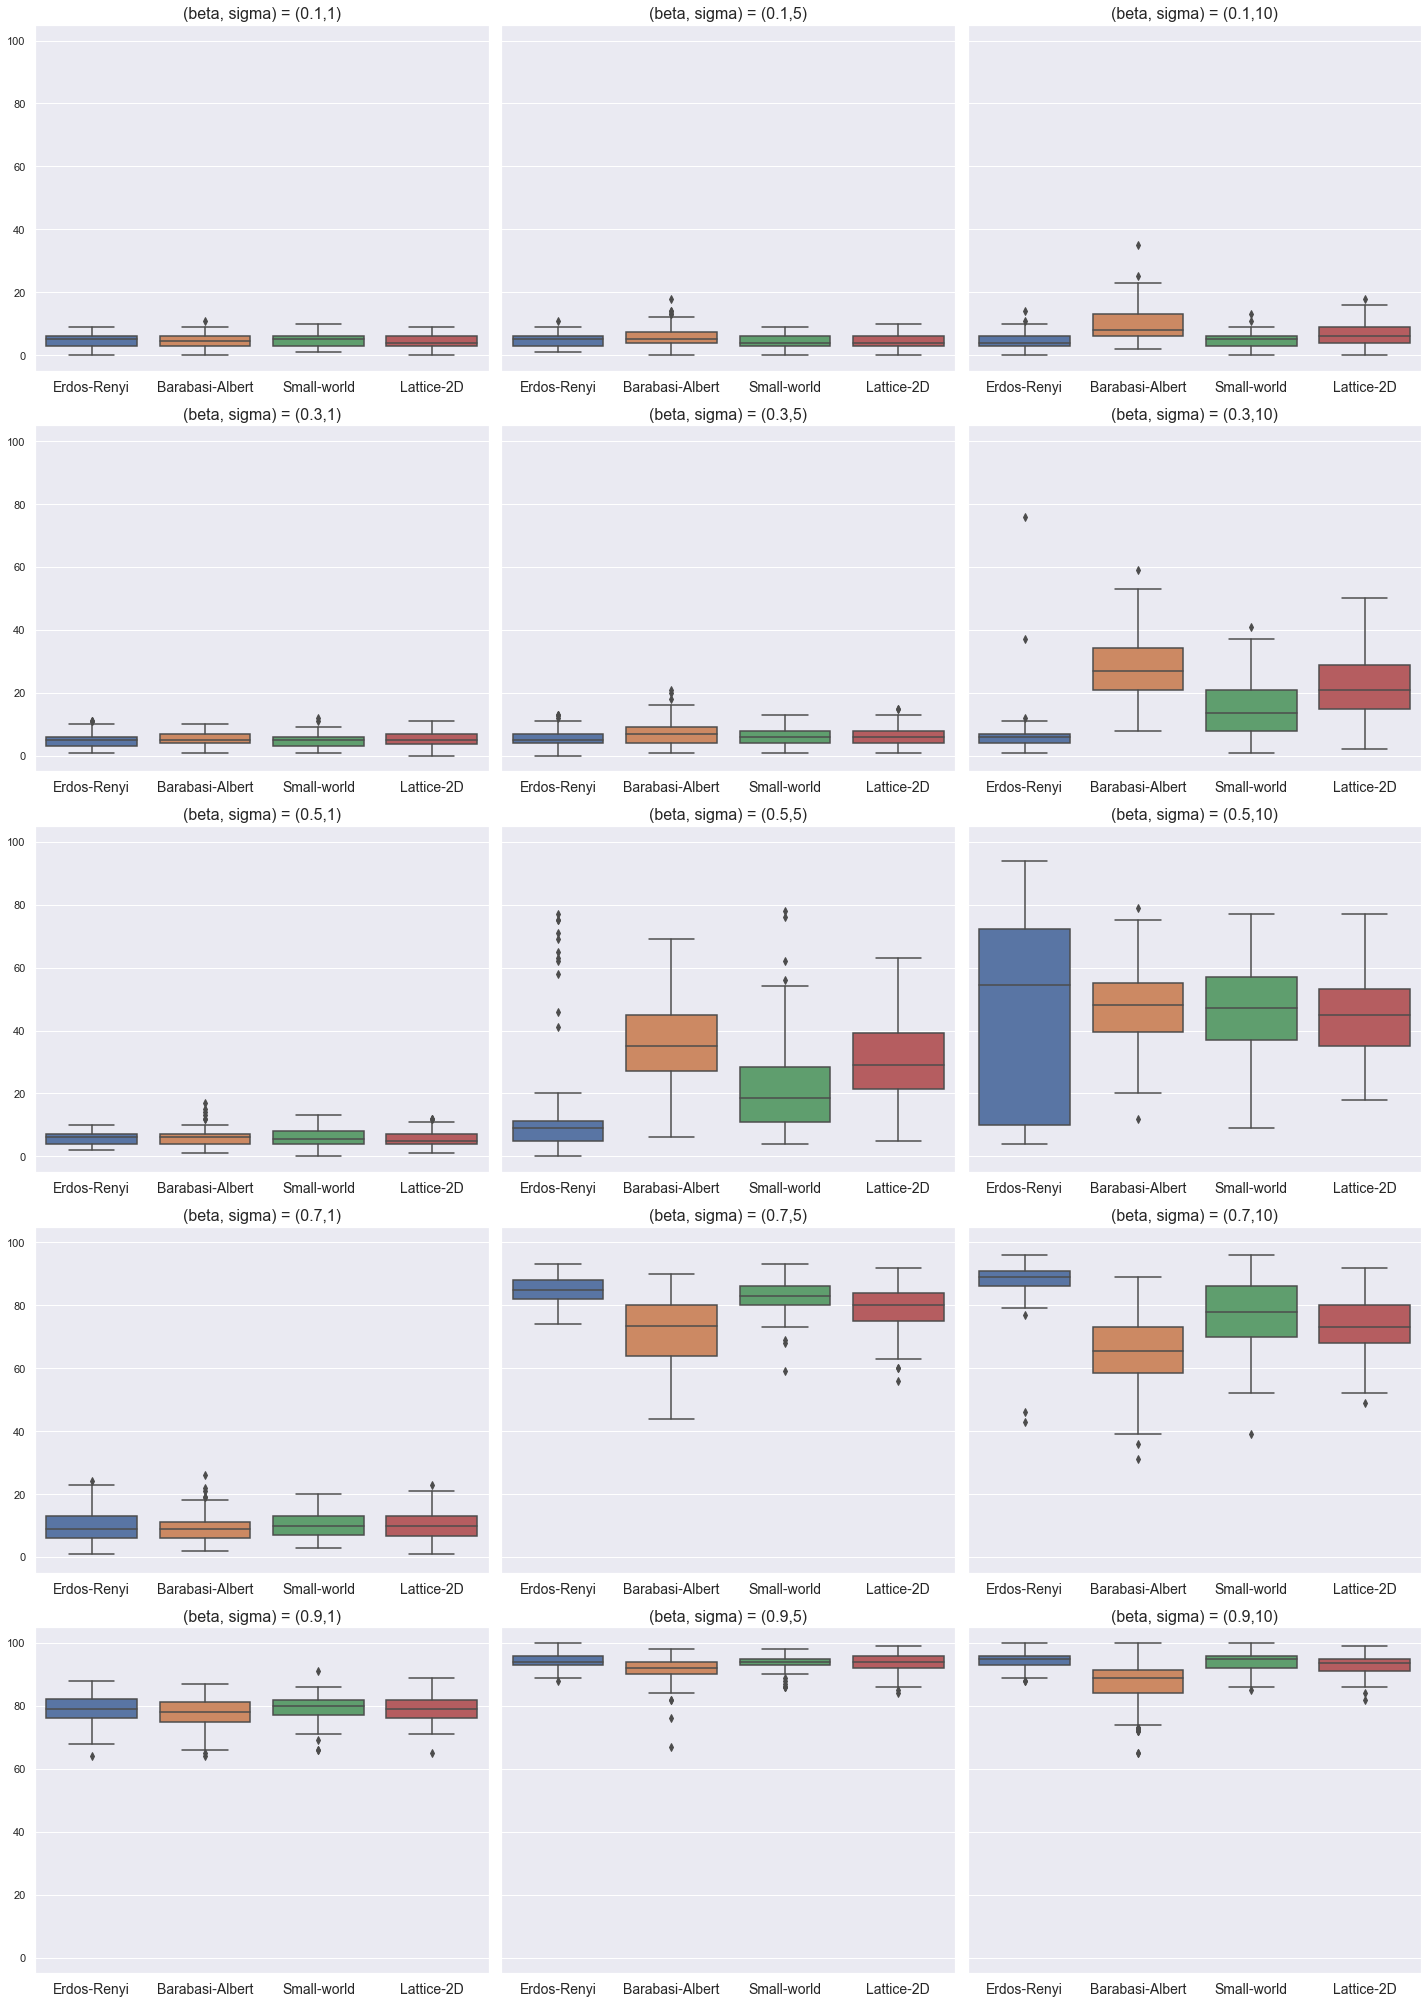

In [32]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=((20,28)), sharey=True)

for i in range(5):
    for j in range(3):
        sns.boxplot(data=lock_list[i*3+j], ax=axes[i,j])
        axes[i,j].set_xticklabels([x.split(sep=" ")[0] for x in lock_list[i*3+j].columns], size=14)
        axes[i,j].set_title("(beta, sigma) = " + lock_list[i*3+j].columns[0].split(sep=" ")[1], size=16)
        #axes[i,j].set_title("Average Opinion (sigma, beta) = ({}).".format(erdos_opinion_df.columns[i*3+j]), size=14)
fig.tight_layout()


# 3D Plot

In [85]:
erdos_3d_df = pd.DataFrame()
erdos_3d_df['x'] = erdos_df.beta
erdos_3d_df['y'] = erdos_df.sigma
erdos_3d_df['z'] = erdos_df.opinion_avg
erdos_3d_df['label'] = erdos_df.nw_topology

barabasi_3d_df = pd.DataFrame()
barabasi_3d_df['x'] = barabasi_df.beta
barabasi_3d_df['y'] = barabasi_df.sigma
barabasi_3d_df['z'] = barabasi_df.opinion_avg
barabasi_3d_df['label'] = barabasi_df.nw_topology

small_3d_df = pd.DataFrame()
small_3d_df['x'] = small_w_df.beta
small_3d_df['y'] = small_w_df.sigma
small_3d_df['z'] = small_w_df.opinion_avg
small_3d_df['label'] = small_w_df.nw_topology

uniform_3d_df = pd.DataFrame()
uniform_3d_df['x'] = uniform_df.beta
uniform_3d_df['y'] = uniform_df.sigma
uniform_3d_df['z'] = uniform_df.opinion_avg
uniform_3d_df['label'] = uniform_df.nw_topology

In [68]:
all_3d_df = pd.DataFrame()
all_3d_df['x'] = results_df.beta
all_3d_df['y'] = results_df.sigma
all_3d_df['z'] = results_df.opinion_avg
all_3d_df['label'] = results_df.nw_topology
all_3d_df

,x,y,z,label
0,0.1,1,0.034692,erdos-renyi
1,0.1,1,0.053764,erdos-renyi
2,0.1,1,0.044671,erdos-renyi
3,0.1,1,0.044678,erdos-renyi
4,0.1,1,0.044260,erdos-renyi
...,...,...,...,...
5995,0.9,10,0.843701,uniform
5996,0.9,10,0.926888,uniform
5997,0.9,10,0.897978,uniform
5998,0.9,10,0.911117,uniform


<Figure size 864x864 with 0 Axes>

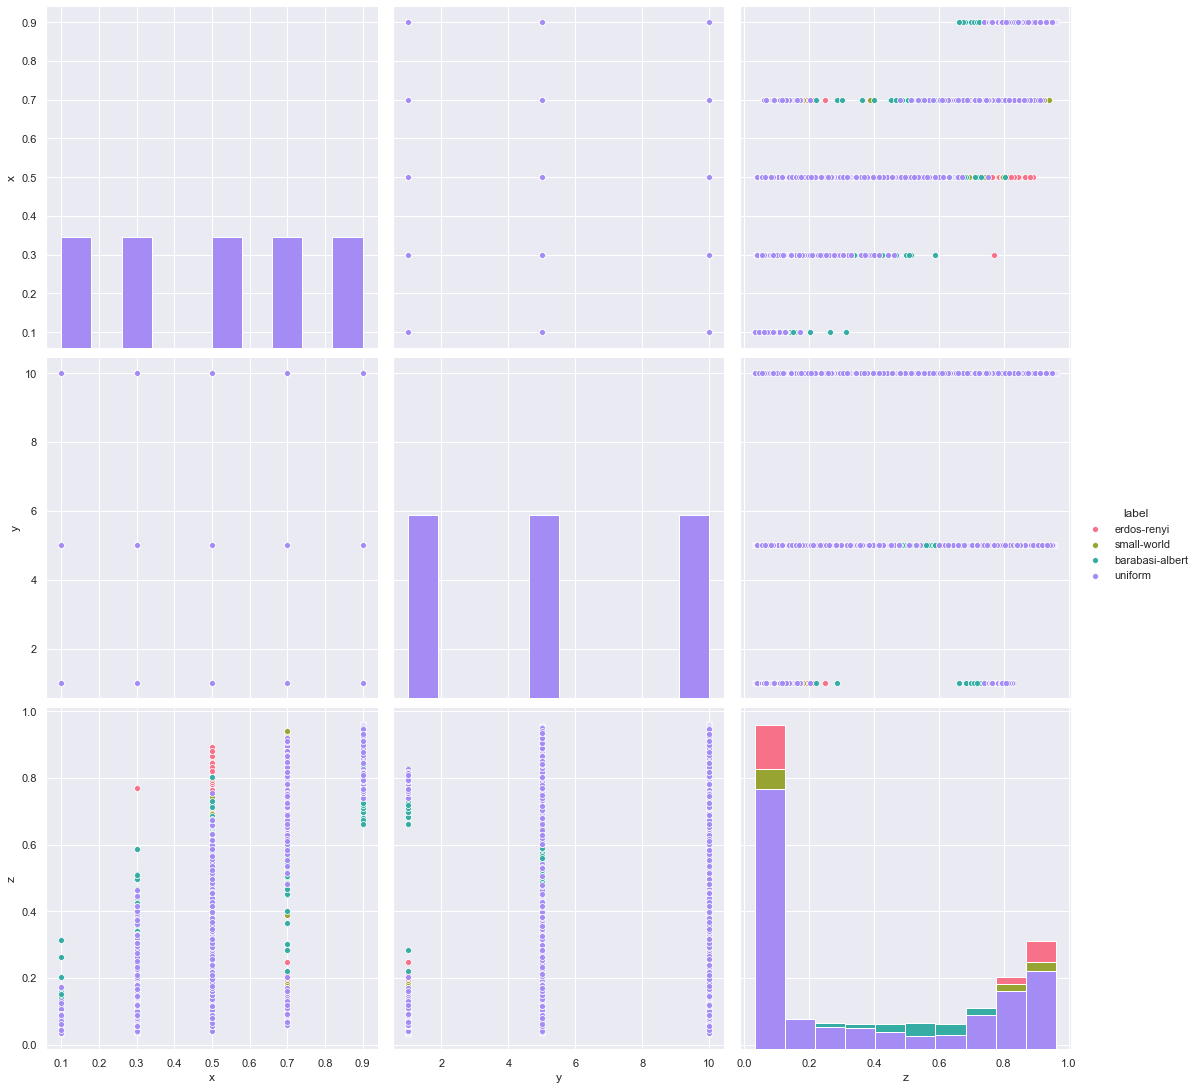

In [78]:
ax=plt.figure(figsize=((12,12)))
sns.pairplot(all_3d_df, height=5, aspect=1., hue='label', diag_kind="hist", palette="husl" )
#palette=sns.cubehelix_palette(5), 

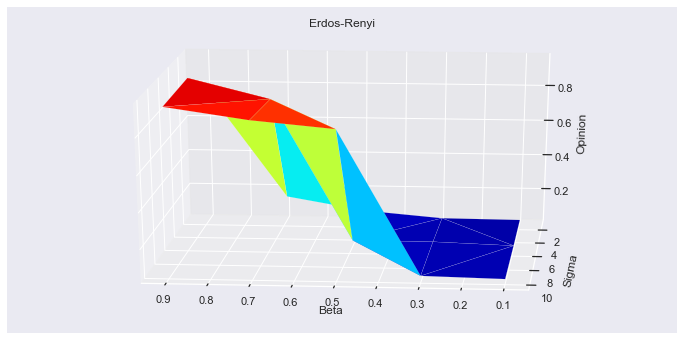

In [135]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

x = np.array(erdos_3d_df["x"])
y = np.array(erdos_3d_df["y"])
z = np.array(erdos_3d_df["z"])


surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)

ax.set_title("Erdos-Renyi")
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)


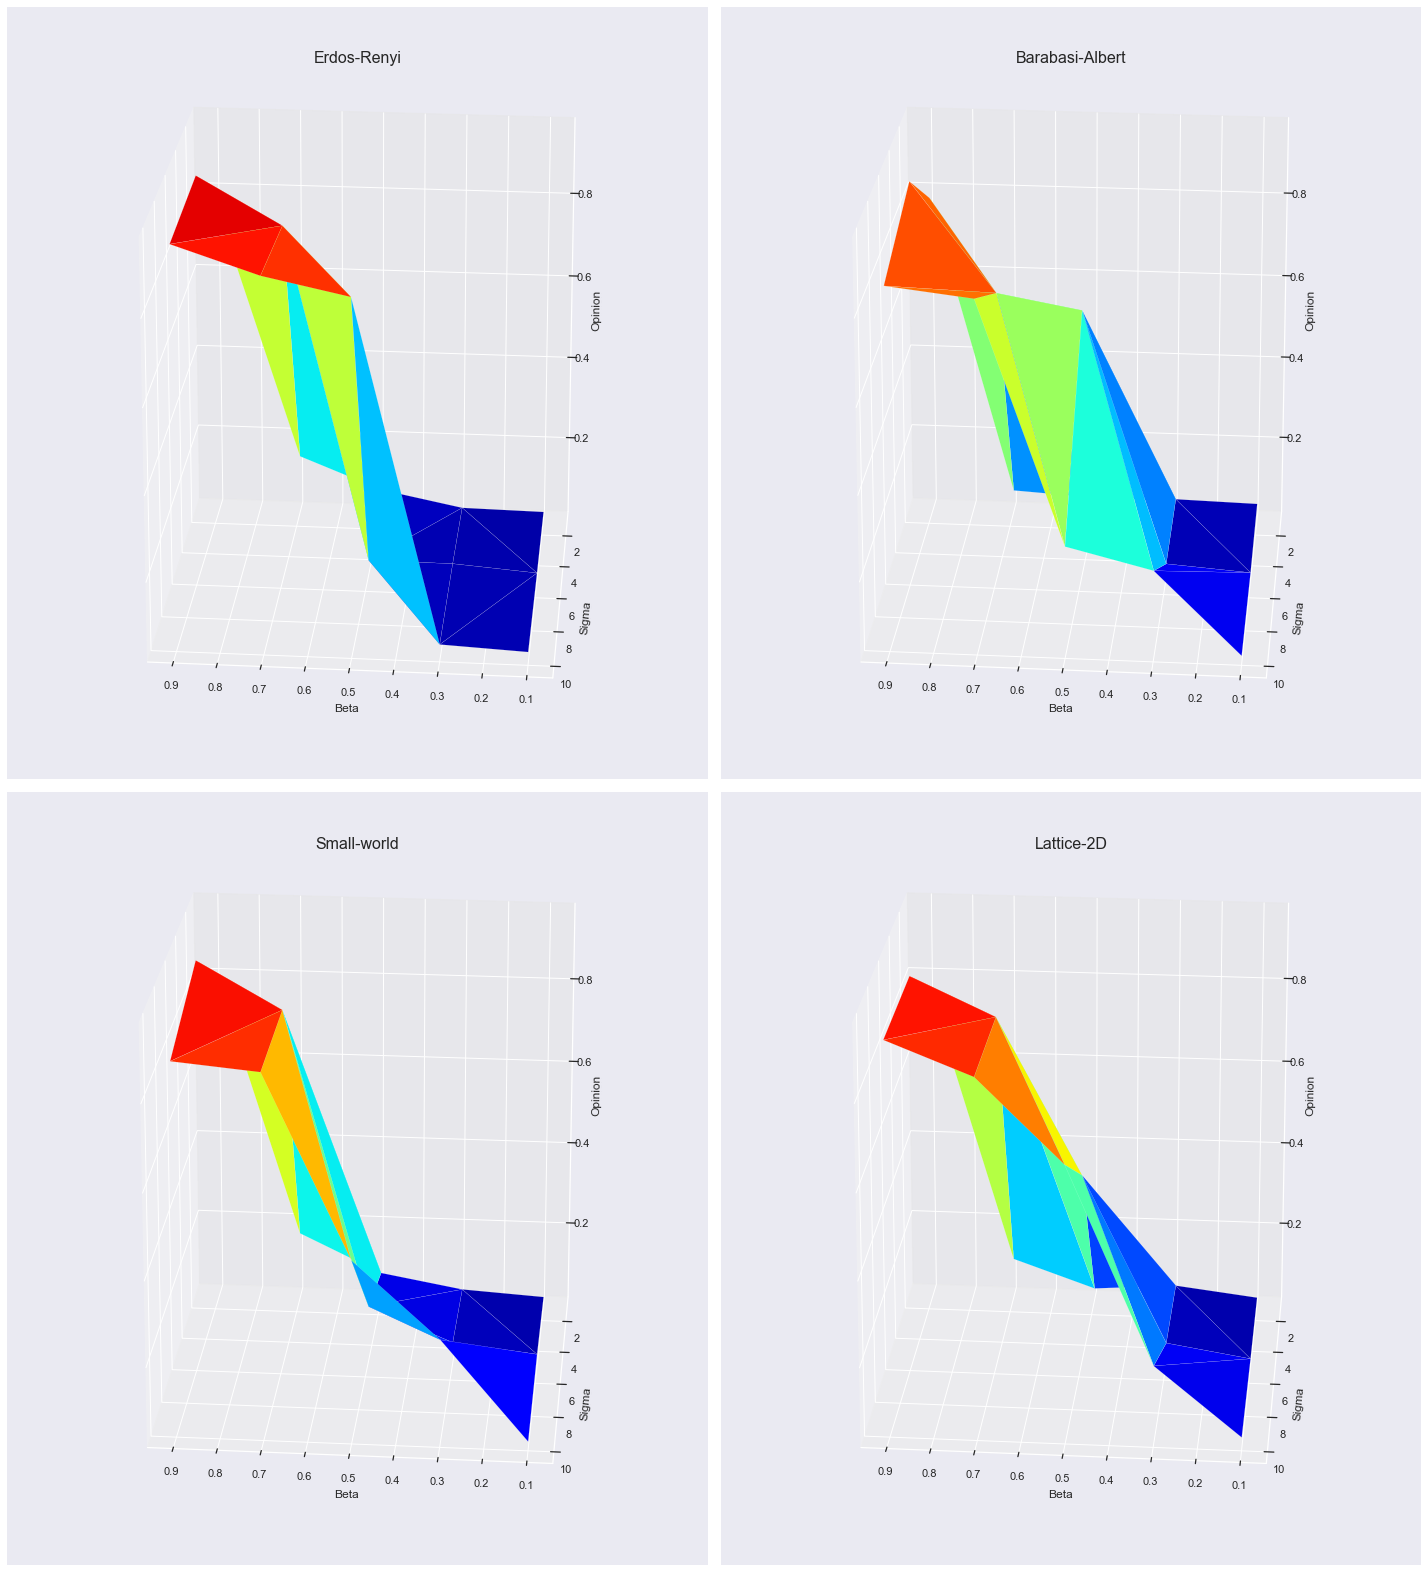

In [149]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((20,22)))
fig = plt.figure(figsize=((20,22)))

ax = fig.add_subplot(2, 2, 1, projection='3d')
#fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(111, projection='3d')

x = np.array(erdos_3d_df["x"])
y = np.array(erdos_3d_df["y"])
z = np.array(erdos_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Erdos-Renyi", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

ax = fig.add_subplot(2, 2, 2, projection='3d')
x = np.array(barabasi_3d_df["x"])
y = np.array(barabasi_3d_df["y"])
z = np.array(barabasi_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Barabasi-Albert", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

##### Small world
ax = fig.add_subplot(2, 2, 3, projection='3d')
x = np.array(small_3d_df["x"])
y = np.array(small_3d_df["y"])
z = np.array(small_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Small-world", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

##### Lattice-2D
ax = fig.add_subplot(2, 2, 4, projection='3d')
x = np.array(uniform_3d_df["x"])
y = np.array(uniform_3d_df["y"])
z = np.array(uniform_3d_df["z"])

surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=1)
ax.set_title("Lattice-2D", fontsize=16)
ax.set_xlabel('Beta')
ax.set_ylabel('Sigma')
ax.set_zlabel('Opinion')

ax.view_init(20, 95)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(16,8))
sns.kdeplot(no_interv_steps, shade=True, color="r")
sns.kdeplot(id_interv_steps, shade=True, color="g")
sns.kdeplot(old_interv_steps, shade=True, color="b")
sns.kdeplot(perc_25_interv_steps, shade=True, color="y")
sns.kdeplot(perc_50_interv_steps, shade=True, color="gray")
sns.kdeplot(perc_75_interv_steps, shade=True, color="pink")
#plt.title('Kernel Density Estimate plot for the number of days each epidemic simulation lasted (no interventions)')
plt.xlabel('Number of Days of Duration')
plt.ylabel('KDE of the Probability Density Function')
plt.legend(["No quarantine", "Quarantine by ID", "Quarantine by age (elderly)",
            "Quarantine by percentage (25%)", "Quarantine by percentage (50%)",
            "Quarantine by percentage (75%)"
           ]).set_visible(True)

## Immune and Infected people

Analyses of immune and infected people for each scenario.

* Important to know the day when the immune people reach 70% of the population

pd.pivot_table(id_interv[['run_number', 'step','immune_people_num', 'infected_people_num']],
               values=['immune_people_num', 'infected_people_num'],
               index=['step'],
               aggfunc=np.nanmean
              ).plot()

In [ ]:
# No intervention
no_interv_im_in_df = gdf.get_immune_infected(no_interv, population='10k')
no_interv_im_in_df['step'] = no_interv_im_in_df.index

# Quarantine by ID
id_interv_im_in_df = gdf.get_immune_infected(id_interv, population='10k')
id_interv_im_in_df['step'] = id_interv_im_in_df.index

# Quarantine by age
old_interv_im_in_df = gdf.get_immune_infected(old_interv, population='10k')
old_interv_im_in_df['step'] = old_interv_im_in_df.index

# Quarantine by percentage (25%)
perc_25_interv_im_in_df = gdf.get_immune_infected(perc_25_interv, population='10k')
perc_25_interv_im_in_df['step'] = perc_25_interv_im_in_df.index

# Quarantine by percentage (50%)
perc_50_interv_im_in_df = gdf.get_immune_infected(perc_50_interv, population='10k')
perc_50_interv_im_in_df['step'] = perc_50_interv_im_in_df.index

# Quarantine by percentage (75%)
perc_75_interv_im_in_df = gdf.get_immune_infected(perc_75_interv, population='10k')
perc_75_interv_im_in_df['step'] = perc_75_interv_im_in_df.index

In [ ]:
# https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=((12,22)), sharey=True)

# FIGURE 1 - No quarantine
sns.lineplot(x='step', y='value', hue='variable', 
              data=pd.melt(no_interv_im_in_df, ['step']), legend=False, ax=axes[0])

axes[0].legend(title="No quarantine", labels=["Immune (%)", "Infected (%)"])
#axes[0].set_xlabel('Number of Days of Duration')
axes[0].set_ylabel("Population (%)", size=14)
axes[0].xaxis.label.set_visible(False)


# FIGURE 2 - Quarantine based on ID
sns.lineplot(x='step', y='value', hue='variable', 
              data=pd.melt(id_interv_im_in_df, ['step']), legend=False, ax=axes[1])

axes[1].legend(title="Quarantine by ID", labels=["Immune (%)", "Infected (%)"])
#axes[1].set_xlabel('Number of Days of Duration')
axes[1].set_ylabel("Population (%)", size=14)
axes[1].xaxis.label.set_visible(False)

# FIGURE 3 - Quarantine based on age (elderly)
sns.lineplot(x='step', y='value', hue='variable', 
              data=pd.melt(old_interv_im_in_df, ['step']), legend=False, ax=axes[2])

axes[2].legend(title="Quarantine by age (elderly)", labels=["Immune (%)", "Infected (%)"])
#axes[1].set_xlabel('Number of Days of Duration')
axes[2].set_ylabel("Population (%)", size=14)
axes[2].xaxis.label.set_visible(False)

# FIGURE 4 - Quarantine based on percantage (25%)
sns.lineplot(x='step', y='value', hue='variable', 
              data=pd.melt(perc_25_interv_im_in_df, ['step']), legend=False, ax=axes[3])

axes[3].legend(title="Quarantine by percentage (25%)", labels=["Immune (%)", "Infected (%)"])
#axes[1].set_xlabel('Number of Days of Duration')
axes[3].set_ylabel("Population (%)", size=14)
axes[3].xaxis.label.set_visible(False)

# FIGURE 5 - Quarantine based on percantage (50%)
sns.lineplot(x='step', y='value', hue='variable', 
              data=pd.melt(perc_50_interv_im_in_df, ['step']), legend=False, ax=axes[4])

axes[4].legend(title="Quarantine by percentage (50%)", labels=["Immune (%)", "Infected (%)"])
#axes[4].set_xlabel('Number of Days of Duration')
axes[4].set_ylabel("Population (%)", size=14)
axes[4].xaxis.label.set_visible(False)

# FIGURE 6 - Quarantine based on percantage (75%)
sns.lineplot(x='step', y='value', hue='variable', 
              data=pd.melt(perc_75_interv_im_in_df, ['step']), legend=False, ax=axes[5])

axes[5].legend(title="Quarantine by percentage (75%)", labels=["Immune (%)", "Infected (%)"])
#axes[5].set_xlabel('Number of Days of Duration')
axes[5].set_ylabel("Population (%)", size=14)
axes[5].xaxis.label.set_visible(False)